### Business Problem:
There is a company, say VIEH Games Corporation. The CEO of the game development company has come up with the plan to make the company more stronger. He said he analysed the market and from his industry knoweldge and reports, he knows that an effective way to attract new customers is to build reputation in mobile game industry. He has following plan: develop an iOS platform stratergy type game with lots of positive attention which bring large audience. So since he is new in mobile games market, He want you to help him answer his question (you are a data scientist):
- What type of stratergy game have great user ratings?
- What makes a mobile game popular?

In [2]:
#Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### 1. Exploring Dataset

In [65]:
'''
Dataset Link
GitHub: https://github.com/viehgroup/YT/blob/main/How%20to%20approach%20a%20Data%20Science%20problem/appstore_games.csv
Google Drive: https://drive.google.com/file/d/1h41bWWaL3DHhNtYrlPNls0VNCCkJAAP6/view?usp=sharing
'''
games=pd.read_csv("appstore_games.csv")
games.head()

,URL,ID,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
0,https://apps.apple.com/us/app/sudoku/id284921427,284921427,Sudoku,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4.00,3553.00,2.99,NaN,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.00,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017
1,https://apps.apple.com/us/app/reversi/id284926400,284926400,Reversi,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.50,284.00,1.99,NaN,"The classic game of Reversi, also known as Oth...",Kiss The Machine,4+,EN,12328960.00,Games,"Games, Strategy, Board",11/07/2008,17/05/2018
2,https://apps.apple.com/us/app/morocco/id284946595,284946595,Morocco,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,3.00,8376.00,0.00,NaN,Play the classic strategy game Othello (also k...,Bayou Games,4+,EN,674816.00,Games,"Games, Board, Strategy",11/07/2008,5/09/2017
3,https://apps.apple.com/us/app/sudoku-free/id28...,285755462,Sudoku (Free),NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,3.50,190394.00,0.00,NaN,"Top 100 free app for over a year.\nRated ""Best...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.00,Games,"Games, Strategy, Puzzle",23/07/2008,30/05/2017
4,https://apps.apple.com/us/app/senet-deluxe/id2...,285831220,Senet Deluxe,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.50,28.00,2.99,NaN,"""Senet Deluxe - The Ancient Game of Life and A...",RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.00,Games,"Games, Strategy, Board, Education",18/07/2008,22/07/2018


In [55]:
#will print (Row x Columns)
games.shape

(4311, 17)

### 2. Data Selection

In [5]:
updated_columns= {n: n.lower().replace(' ', '_') for n in games.columns}

In [6]:
updated_columns

{'URL': 'url',
 'ID': 'id',
 'Name': 'name',
 'Subtitle': 'subtitle',
 'Icon URL': 'icon_url',
 'Average User Rating': 'average_user_rating',
 'User Rating Count': 'user_rating_count',
 'Price': 'price',
 'In-app Purchases': 'in-app_purchases',
 'Description': 'description',
 'Developer': 'developer',
 'Age Rating': 'age_rating',
 'Languages': 'languages',
 'Size': 'size',
 'Primary Genre': 'primary_genre',
 'Genres': 'genres',
 'Original Release Date': 'original_release_date',
 'Current Version Release Date': 'current_version_release_date'}

In [7]:
games.rename(columns=updated_columns, inplace="True")
games.head()

,url,id,name,subtitle,icon_url,average_user_rating,user_rating_count,price,in-app_purchases,description,developer,age_rating,languages,size,primary_genre,genres,original_release_date,current_version_release_date
0,https://apps.apple.com/us/app/sudoku/id284921427,284921427,Sudoku,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4.0,3553.0,2.99,NaN,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017
1,https://apps.apple.com/us/app/reversi/id284926400,284926400,Reversi,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.5,284.0,1.99,NaN,"The classic game of Reversi, also known as Oth...",Kiss The Machine,4+,EN,12328960.0,Games,"Games, Strategy, Board",11/07/2008,17/05/2018
2,https://apps.apple.com/us/app/morocco/id284946595,284946595,Morocco,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,3.0,8376.0,0.00,NaN,Play the classic strategy game Othello (also k...,Bayou Games,4+,EN,674816.0,Games,"Games, Board, Strategy",11/07/2008,5/09/2017
3,https://apps.apple.com/us/app/sudoku-free/id28...,285755462,Sudoku (Free),NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,3.5,190394.0,0.00,NaN,"Top 100 free app for over a year.\nRated ""Best...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,Games,"Games, Strategy, Puzzle",23/07/2008,30/05/2017
4,https://apps.apple.com/us/app/senet-deluxe/id2...,285831220,Senet Deluxe,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.5,28.0,2.99,NaN,"""Senet Deluxe - The Ancient Game of Life and A...",RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,Games,"Games, Strategy, Board, Education",18/07/2008,22/07/2018


In [8]:
games.set_index(keys='id', inplace=True)
games.head()

,url,name,subtitle,icon_url,average_user_rating,user_rating_count,price,in-app_purchases,description,developer,age_rating,languages,size,primary_genre,genres,original_release_date,current_version_release_date
id,,,,,,,,,,,,,,,,,
284921427,https://apps.apple.com/us/app/sudoku/id284921427,Sudoku,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4.0,3553.0,2.99,NaN,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017
284926400,https://apps.apple.com/us/app/reversi/id284926400,Reversi,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.5,284.0,1.99,NaN,"The classic game of Reversi, also known as Oth...",Kiss The Machine,4+,EN,12328960.0,Games,"Games, Strategy, Board",11/07/2008,17/05/2018
284946595,https://apps.apple.com/us/app/morocco/id284946595,Morocco,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,3.0,8376.0,0.00,NaN,Play the classic strategy game Othello (also k...,Bayou Games,4+,EN,674816.0,Games,"Games, Board, Strategy",11/07/2008,5/09/2017
285755462,https://apps.apple.com/us/app/sudoku-free/id28...,Sudoku (Free),NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,3.5,190394.0,0.00,NaN,"Top 100 free app for over a year.\nRated ""Best...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,Games,"Games, Strategy, Puzzle",23/07/2008,30/05/2017
285831220,https://apps.apple.com/us/app/senet-deluxe/id2...,Senet Deluxe,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.5,28.0,2.99,NaN,"""Senet Deluxe - The Ancient Game of Life and A...",RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,Games,"Games, Strategy, Board, Education",18/07/2008,22/07/2018


In [9]:
games.drop(columns=['url', 'icon_url'], inplace=True)
games.head()

,name,subtitle,average_user_rating,user_rating_count,price,in-app_purchases,description,developer,age_rating,languages,size,primary_genre,genres,original_release_date,current_version_release_date
id,,,,,,,,,,,,,,,
284921427,Sudoku,NaN,4.0,3553.0,2.99,NaN,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017
284926400,Reversi,NaN,3.5,284.0,1.99,NaN,"The classic game of Reversi, also known as Oth...",Kiss The Machine,4+,EN,12328960.0,Games,"Games, Strategy, Board",11/07/2008,17/05/2018
284946595,Morocco,NaN,3.0,8376.0,0.00,NaN,Play the classic strategy game Othello (also k...,Bayou Games,4+,EN,674816.0,Games,"Games, Board, Strategy",11/07/2008,5/09/2017
285755462,Sudoku (Free),NaN,3.5,190394.0,0.00,NaN,"Top 100 free app for over a year.\nRated ""Best...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,Games,"Games, Strategy, Puzzle",23/07/2008,30/05/2017
285831220,Senet Deluxe,NaN,3.5,28.0,2.99,NaN,"""Senet Deluxe - The Ancient Game of Life and A...",RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,Games,"Games, Strategy, Board, Education",18/07/2008,22/07/2018


In [10]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17007 entries, 284921427 to 1475076711
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   name                          17007 non-null  object 
 1   subtitle                      5261 non-null   object 
 2   average_user_rating           7561 non-null   float64
 3   user_rating_count             7561 non-null   float64
 4   price                         16983 non-null  float64
 5   in-app_purchases              7683 non-null   object 
 6   description                   17007 non-null  object 
 7   developer                     17007 non-null  object 
 8   age_rating                    17007 non-null  object 
 9   languages                     16947 non-null  object 
 10  size                          17006 non-null  float64
 11  primary_genre                 17007 non-null  object 
 12  genres                        17007 non-null  o

In [11]:
games['original_release_date']= pd.to_datetime(games['original_release_date'])

In [12]:
games['current_version_release_date']= pd.to_datetime(games['current_version_release_date'])

In [13]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17007 entries, 284921427 to 1475076711
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   name                          17007 non-null  object        
 1   subtitle                      5261 non-null   object        
 2   average_user_rating           7561 non-null   float64       
 3   user_rating_count             7561 non-null   float64       
 4   price                         16983 non-null  float64       
 5   in-app_purchases              7683 non-null   object        
 6   description                   17007 non-null  object        
 7   developer                     17007 non-null  object        
 8   age_rating                    17007 non-null  object        
 9   languages                     16947 non-null  object        
 10  size                          17006 non-null  float64       
 11  primary_genre  

In [56]:
#Calculate and sum the NaN/Null values
games.isnull().sum()

name                               0
subtitle                        2523
average_user_rating                0
user_rating_count                  0
price                              0
in-app_purchases                1313
description                        0
developer                          0
age_rating                         0
languages                         14
size                               0
primary_genre                      0
genres                             0
original_release_date              0
current_version_release_date       0
new_rating                         0
new_price                          0
dtype: int64

In [15]:
np.array_equal(games['average_user_rating'].isnull(), games['user_rating_count'].isnull())

True

In [16]:
games=games.loc[games['average_user_rating'].notnull()]

In [17]:
games=games.loc[games['user_rating_count'] >=30]

In [18]:
games.shape

(4311, 15)

In [19]:
games.isnull().sum()

name                               0
subtitle                        2523
average_user_rating                0
user_rating_count                  0
price                              0
in-app_purchases                1313
description                        0
developer                          0
age_rating                         0
languages                         14
size                               0
primary_genre                      0
genres                             0
original_release_date              0
current_version_release_date       0
dtype: int64

### 3. Using Descriptive Statistics

In [20]:
games.describe()

,average_user_rating,user_rating_count,price,size
count,4311.000000,4.311000e+03,4311.000000,4.311000e+03
mean,4.163535,5.789754e+03,0.677878,1.759569e+08
std,0.596239,5.592425e+04,2.910916,2.866278e+08
min,1.500000,3.000000e+01,0.000000,2.158400e+05
25%,4.000000,7.000000e+01,0.000000,4.073626e+07
50%,4.500000,2.210000e+02,0.000000,9.730048e+07
75%,4.500000,1.192000e+03,0.000000,2.085176e+08
max,5.000000,3.032734e+06,139.990000,4.005591e+09


In [21]:
games["user_rating_count"].sort_values(ascending=False).head(10)

id
529479190     3032734.0
1053012308    1277095.0
1330123889     711409.0
597986893      469562.0
1094591345     439776.0
672150402      400787.0
1270598321     374772.0
1116645064     283035.0
297558390      273687.0
847985808      259030.0
Name: user_rating_count, dtype: float64

In [22]:
(games["user_rating_count"] >= 1e5).sum()

40

In [64]:
print('Games which has more than 1 lakh ratings: ', round(40/games['user_rating_count'].count(), 2) *100, '%')

Games which has more than 1 lakh ratings:  1.0 %


<font color='blue'>**Analysis:** The data from the user rating counts, suggests that it is very hard for a strategy game to become hugely popular. The data tells us that less than 1% of the strategy games can be considered as popular (in terms of number of user rating) while more than 75% of the games have less than 1200 user ratings which indicates a very low user base.</font>

In [23]:
games['average_user_rating'].describe()

count    4311.000000
mean        4.163535
std         0.596239
min         1.500000
25%         4.000000
50%         4.500000
75%         4.500000
max         5.000000
Name: average_user_rating, dtype: float64

In [57]:
pd.set_option('display.float_format', lambda x: '%.2f' %x)

In [58]:
games['average_user_rating'].describe()

count   4311.00
mean       4.16
std        0.60
min        1.50
25%        4.00
50%        4.50
75%        4.50
max        5.00
Name: average_user_rating, dtype: float64

<center> Extra Insight </center>

In [24]:
rating_4_5= (games['average_user_rating'] == 4.5).sum()
rating_4_5

2062

In [25]:
proporting_4_5= (games['average_user_rating'] == 4.5).mean()
print(proporting_4_5*100,'%')

47.831129668290416 %


There are more than 47% games which has 4.5 as average rating. So if we are building a stratergy games, we have 47% chance we can get 4.5 as average rating!

### 4. Univariate EDA

In [26]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4311 entries, 284921427 to 1474461379
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   name                          4311 non-null   object        
 1   subtitle                      1788 non-null   object        
 2   average_user_rating           4311 non-null   float64       
 3   user_rating_count             4311 non-null   float64       
 4   price                         4311 non-null   float64       
 5   in-app_purchases              2998 non-null   object        
 6   description                   4311 non-null   object        
 7   developer                     4311 non-null   object        
 8   age_rating                    4311 non-null   object        
 9   languages                     4297 non-null   object        
 10  size                          4311 non-null   float64       
 11  primary_genre   

In [59]:
#Converting Bytes into Megabytes (MBs)
games['size'] /= 1e6

<AxesSubplot:>

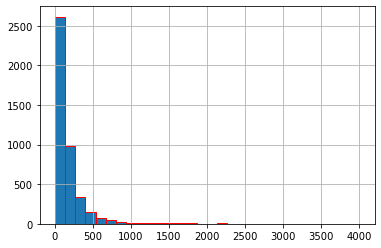

In [28]:
games['size'].hist(bins=30, ec='red')

In [29]:
games['size'].describe()

count    4311.000000
mean      175.956867
std       286.627800
min         0.215840
25%        40.736256
50%        97.300480
75%       208.517632
max      4005.591040
Name: size, dtype: float64

In [30]:
games['size'].sort_values(ascending=False).head(12)

id
1245565445    4005.591040
1106831630    3916.692480
633625517     3747.742720
1235863443    3716.897792
1183898700    3599.435776
881270303     3518.277632
1107741196    3321.082880
909472985     2996.021248
1321791212    2897.696768
1298734617    2581.730304
1264531625    2547.534848
1257031979    2512.028672
Name: size, dtype: float64

array([[<AxesSubplot:title={'center':'average_user_rating'}>,
        <AxesSubplot:title={'center':'user_rating_count'}>],
       [<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'size'}>]], dtype=object)

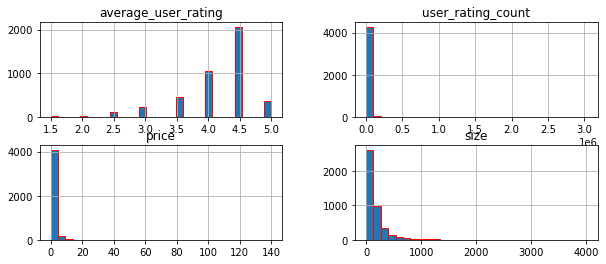

In [31]:
games.hist(figsize=(10, 4), bins=30, ec='red')

In [32]:
price_filter=games['price']<= games['price'].quantile(0.99)
user_rating_count_filter=games['user_rating_count']<= games['user_rating_count'].quantile(0.99)
size_filter=games['size']<= games['size'].quantile(0.99)

In [33]:
exclude_top_1= price_filter & user_rating_count_filter & size_filter

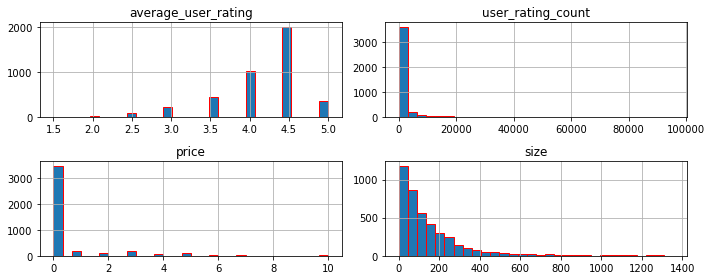

In [34]:
games[exclude_top_1].hist(figsize=(10, 4), bins=30, ec='red')
plt.tight_layout()

1. Most of the games are free and very few are not free.
2. Most of the paid games are under 10 dollar
3. 4.5 is the most common average user rating.
4. There are very few games whose rating is less than 3
5. Large size game is rare

In [38]:
games['age_rating'].value_counts()

4+     2287
9+      948
12+     925
17+     151
Name: age_rating, dtype: int64

<AxesSubplot:>

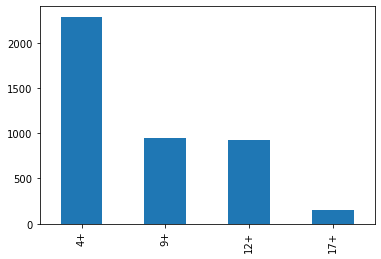

In [39]:
games['age_rating'].value_counts().plot(kind='bar')

<AxesSubplot:>

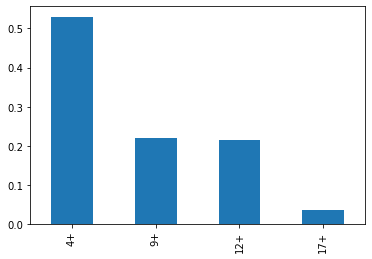

In [40]:
games['age_rating'].value_counts(normalize=True).plot(kind='bar')

In [41]:
age_percentage = 100*games['age_rating'].value_counts(normalize=True)
for x, y in age_percentage.items():
    print("{}: {}%".format(x, round(y, 1)))

4+: 53.1%
9+: 22.0%
12+: 21.5%
17+: 3.5%


1. More than 50% of the games are 4+ means evenkids can play the games
2. Very few games (less than 3.5%) games are 17+

## Bi-variate EDA

On basis of variables, we have three cases
1. Numeric VS Numeric: Scatter Plot
2. Numeric VS Categorical: BoxPlots (others depend on what we are trying to find)
3. Categorical VS Categorical: Contigency Table

![title](scatterpattern.jpg)

1. Numerical VS Numerical

What is relation between Size of the game and the average rating of the game?

<AxesSubplot:xlabel='size', ylabel='average_user_rating'>

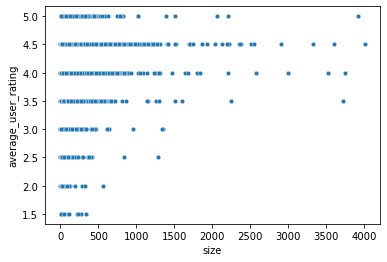

In [42]:
sns.scatterplot(x='size', y='average_user_rating', data=games, s=20)

<font color='blue'>**Analysis:** If we ignore the small size games, we can clearly see that the games which has size of 2GB or more have high ratings. No games which has high size have rating below 3.5. But High size means High graphics which directly increase the rating.</font>

2. Numerical VS Categorical

In [43]:
ratings_mapping = {1.5: 'poor', 2.0: 'poor', 2.5: 'poor', 3.0: 'fair',
                  3.5: 'fair', 4.0: 'good', 4.5: 'good',
                  5.0: 'excellent'}

In [44]:
games['new_rating'] = games['average_user_rating'].map(ratings_mapping)

<AxesSubplot:xlabel='new_rating', ylabel='size'>

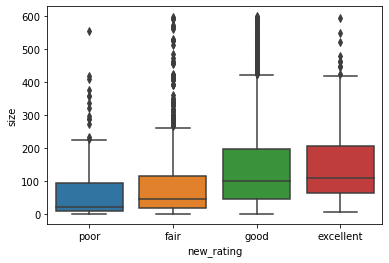

In [45]:
sns.boxplot(x='new_rating', y='size', data=games[games['size'] <= 600],
               order=['poor', 'fair', 'good', 'excellent'])

So for the games under 600 MB, the quality and the graphics matters and it directly affect the rating of the games.

3. Categorical VS Categorical

What is the relationship between Age and the average rating of the game?

In [46]:
pd.crosstab(games['age_rating'], games['new_rating'])

new_rating,excellent,fair,good,poor
age_rating,,,,
12+,75,116,710,24
17+,13,24,109,5
4+,199,395,1594,99
9+,83,150,698,17


Still we can't find insight from the above data. We need to see if there is some relation between these two variables. Let's say we find that more than 85% of the games rated POOR who was for 4+ years and at the same time we see that around 10% of the games are rated POOR who as for 17+ then we can say that there is relation.

In [47]:
pd.crosstab(games['age_rating'], games['new_rating'], normalize='index')*100

new_rating,excellent,fair,good,poor
age_rating,,,,
12+,8.108108,12.540541,76.756757,2.594595
17+,8.609272,15.894040,72.185430,3.311258
4+,8.701355,17.271535,69.698295,4.328815
9+,8.755274,15.822785,73.628692,1.793249


<font color='blue'>**Analysis:** So here we can see that there is almost same values in the EXCELLENT column and it is true for other columns too. So here we can see that age doen't play an important role for ratings of the games.</font>

#### Hypothetical Questions: Whether Free games have high rating than Paid games?

In [48]:
games['price'].unique()

array([  2.99,   1.99,   0.  ,   0.99,   5.99,   7.99,   4.99,   3.99,
         9.99,  19.99,   6.99,  11.99,   8.99, 139.99,  14.99,  59.99])

In [49]:
games['price'] = games['price'].round()

In [50]:
games['price'].unique()

array([  3.,   2.,   0.,   1.,   6.,   8.,   5.,   4.,  10.,  20.,   7.,
        12.,   9., 140.,  15.,  60.])

<AxesSubplot:>

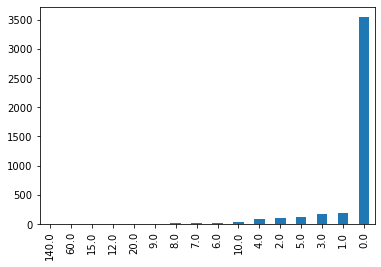

In [51]:
games['price'].value_counts().sort_values().plot(kind='bar')

In [52]:
games['new_price']= (games['price'] == 0).astype(int).map({0: 'Free', 1: 'Paid'})

<AxesSubplot:xlabel='new_price', ylabel='average_user_rating'>

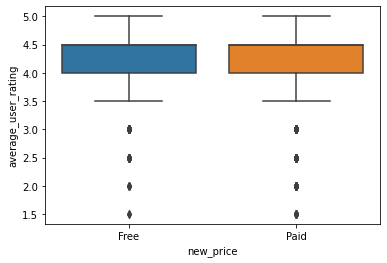

In [53]:
sns.boxplot(x='new_price', y='average_user_rating', data=games)

<font color='blue'>**Analysis:** From the above plot we can see that both the box plot are identicals which means Price doesn't affect the ratings of the games.</font>

#### Final Statement

<font color='red'>**Analysis:** We have analysed the whole Apple Store Mobile game market on which we got more than 17 thousands stratergy games on iOS. When we ignored the games which has less than 30 ratings (since less than 30 is a bad reputation) we got left with 4311 games. On our first analysis, we found that it is very hard for a strategy game to become hugely popular. The data tells us that less than 1% of the strategy games can be considered as popular (in terms of number of user rating) while more than 75% of the games have less than 1200 user ratings which indicates a very low user base. To which we anlayzed further and found out the factors affecting the ratings. As a mobile game, we still have around 47% of chnace to get an average user rating of 4.5 (but that doesn't mean we will get more user ratings as total). The size of the game plays an important role in the ratings of the game. More the graphics of our game, More the size will be and hence more the rating of the game. But on that part, we found there are very few games which has a larger game size, so the auidence for the game will be less as compared to low game size audience. We found only 3.5% of the games to be 17+, so making 17+ (Adult) game can be a drawback for us, since we will loose a large amount of audience. But when directly comparing Age with Rating, we found age doesn't affect our ratings of the game. Even if we are building a 17+ game, we may only get a small amount of audience but the ratings will not be affected. Also price too doesn't affect the ratings of the game. Both free and paid games have similar user ratings. The only difference is the audience base. Free games have large amount of audience whereas paid games have less.

So to sum up:
Only Size of the game affects the ratings of the game, whereas Price and Age affects the audience base.</font>

### Extra Activities you can perform

1. You can see whether languages affects the games or not? (HINT: Make language category and use 2nd case, or you can encode the vraiables and perform the KNN)
2. You can see which primary genre has highest rating
3. You can see whether lastest version of the game affects the game ratings?
